In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [180]:
# Reading from csv
ccDf = pd.read_csv('Credit Card Customer Data.csv')
ccDf.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [181]:
# Printing rows and columns
ccDf.shape

(660, 7)

In [182]:
# Printing data types
ccDf.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [183]:
#checking for na / null values
ccDf.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

# Question 1 and 2

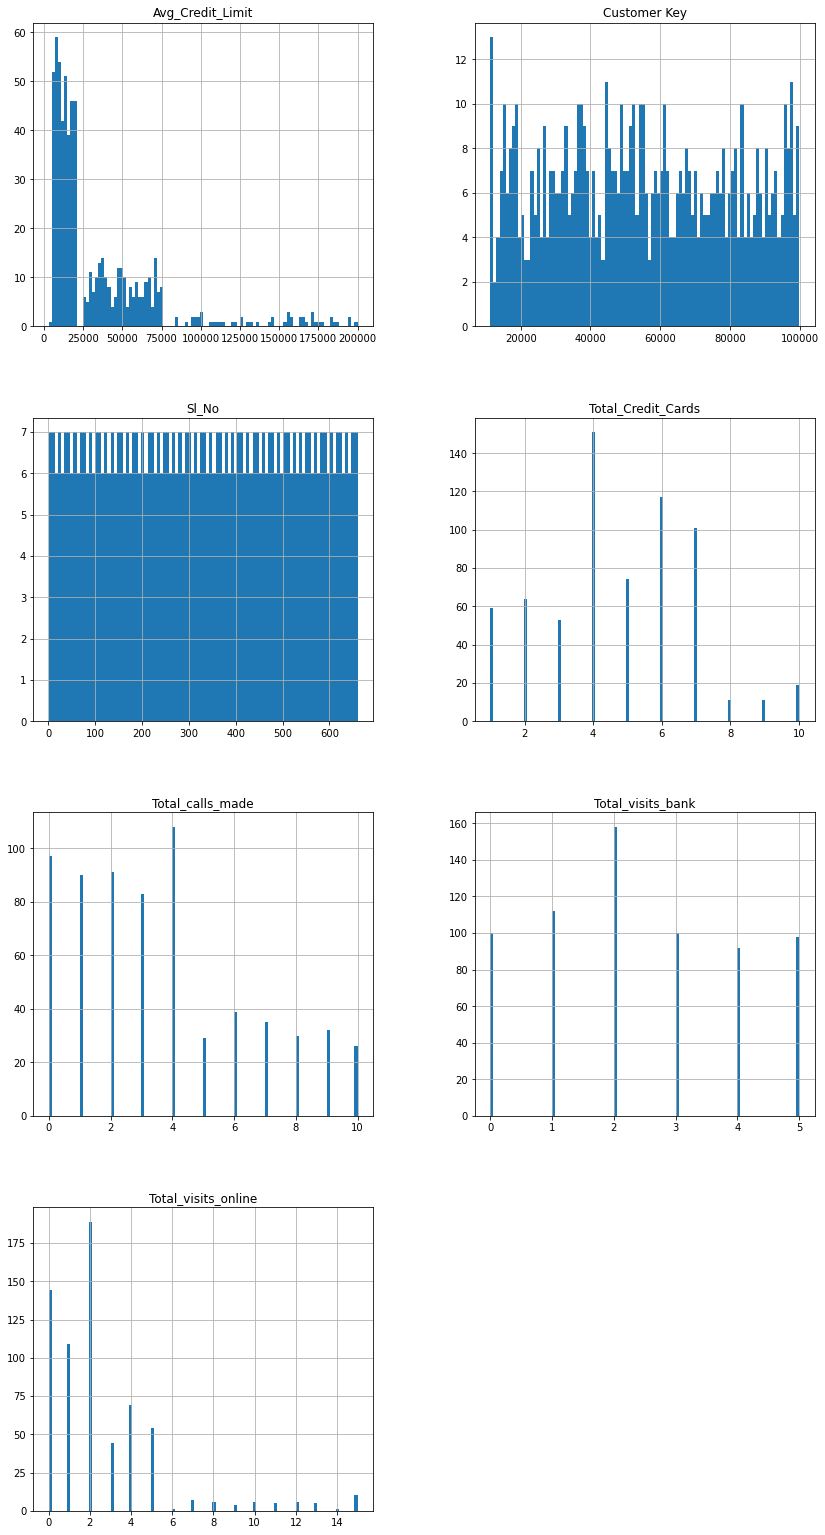

In [184]:
# performing univariate analysis on numerical variables
ccDf.hist(stacked=False, bins=100, figsize=(14,100), layout=(14,2));

# - We can ingnore customer Key and sl_no from above plots but we can take          other columns in to consideration for univariate analsys 
# - We can say the customers with less avg_credit_limit are more . Data is                 skewed
# - Total_visits_bank looks evenly distributed




In [185]:
dupDataDf = ccDf.groupby('Customer Key').count()

print('Num dups= ',dupDataDf.loc[gb_cccd.Total_calls_made >=2].shape[1])

for k in list(dupDataDf.loc[dupDataDf.Total_calls_made >=2].index):
    display(ccDf.loc[ccDf['Customer Key'] == k])

Num dups=  6


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


# Looks like customerKey is duplicate but rest of the columns are not. I would still delete it considering that they are very low in number and we dont know the background on why this split happened. We can assume these records as bad data points based on several assumptions like bad entries or they were impacted by data breach or something else.
# Considering above factors and not to over complicate things I will delete these records

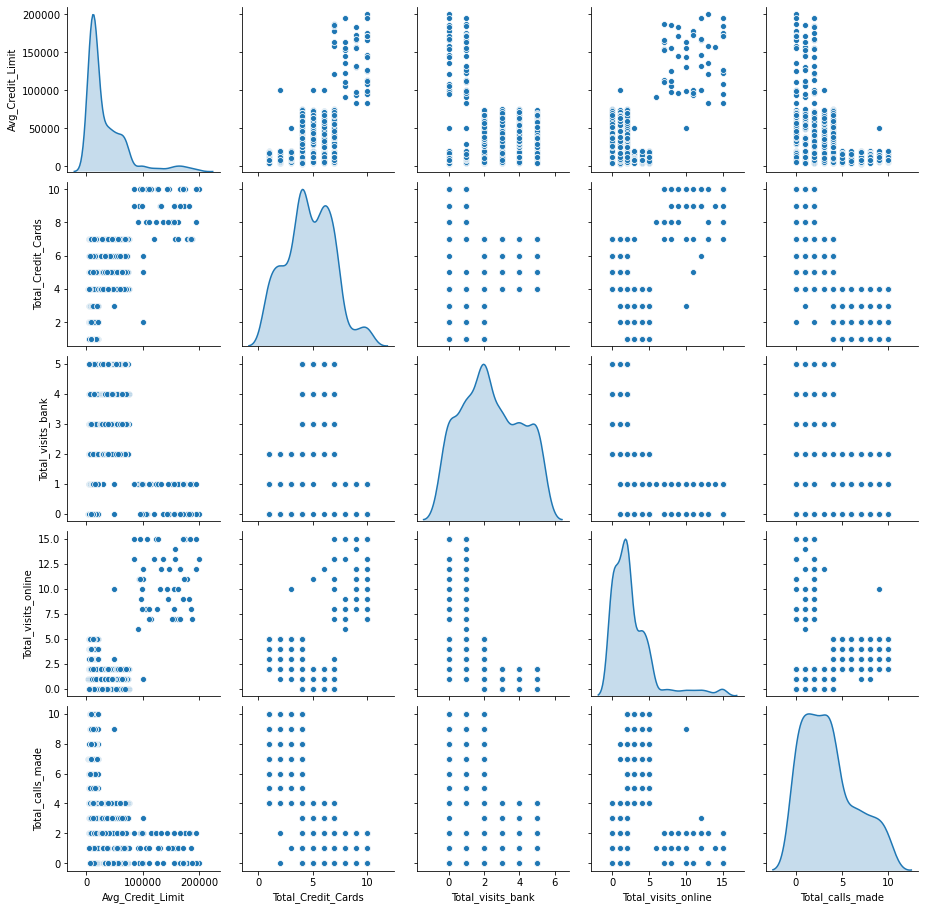

In [186]:
sns.pairplot(ccDf[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']], diag_kind='kde');

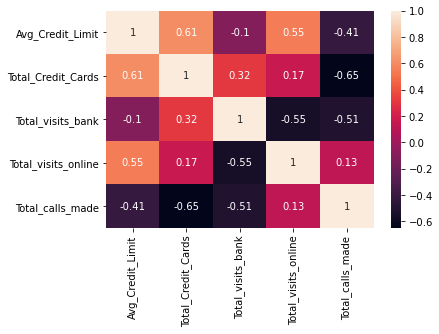

In [187]:
sns.heatmap(ccDf[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']].corr(), annot=True);

# Quetion 3

In [188]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore


# scaledccDf = ccDf.copy()
# scaledccDf[:] = StandardScaler().fit_transform(scaledccDf)
tscaledccDf=ccDf.iloc[:,:]
scaledccDf=tscaledccDf.apply(zscore)
scaledccDf.drop('Customer Key', axis=1, inplace=True)
scaledccDf.drop('Sl_No', axis=1, inplace=True)


cols = list(scaledccDf.columns)
scaledccDf.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


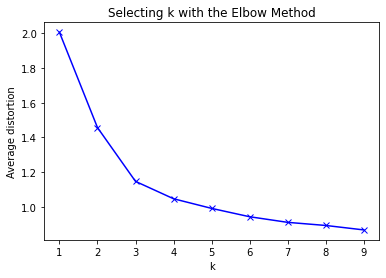

In [189]:
from sklearn.cluster import KMeans

from scipy.spatial.distance import cdist
meanDistortions=[]

for k in range(1, 10):
    model=KMeans(n_clusters=k)
    model.fit(scaledccDf)
    prediction=model.predict(scaledccDf)
    meanDistortions.append(sum(np.min(cdist(scaledccDf, model.cluster_centers_, 'euclidean'), axis=1)) / scaledccDf.shape[0])


plt.plot(range(1, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

# We can pick k=3 from above graph

In [190]:
from sklearn.metrics import silhouette_score


model = KMeans(n_clusters=3)
model.fit(scaledccDf)
preds = model.predict(scaledccDf)
labels = model.labels_
score1=silhouette_score(scaledccDf, labels, metric='euclidean')
score1

0.5157182558881063

In [191]:
scaledccDf1= X = scaledccDf.drop(['Total_calls_made'],axis=1)


In [192]:
from sklearn.metrics import silhouette_score


model = KMeans(n_clusters=3)
model.fit(scaledccDf1)
preds = model.predict(scaledccDf1)
labels = model.labels_
silhouette_score(scaledccDf1, labels, metric='euclidean')

0.49069829816445293

Looks like dropping a field is giving me even lesser score so will keep it back

In [193]:
#Append the prediction 
ccDf["GROUP"] = preds
scaledccDf["GROUP"] = preds
print("Groups Assigned : \n")
scaledccDf.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,1
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,1
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,1
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,2


In [194]:
# ccDf2=ccDf.drop(['Customer Key','Sl_No'],axis=1)
# ccDfClust = ccDf.groupby(['GROUP'])
# ccDfClust.mean()

In [195]:
# ccDfClust.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))


In [196]:
ccDfClust1 = scaledccDf.groupby(['GROUP'])
ccDfClust1.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,-0.019344,0.387830,0.686504,-0.557384,-0.551162
1,-0.581198,-1.039389,-0.887000,0.302521,1.093536
2,2.831764,1.862226,-1.105763,2.827319,-0.874330


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1278ef3a0>,
      dtype=object)

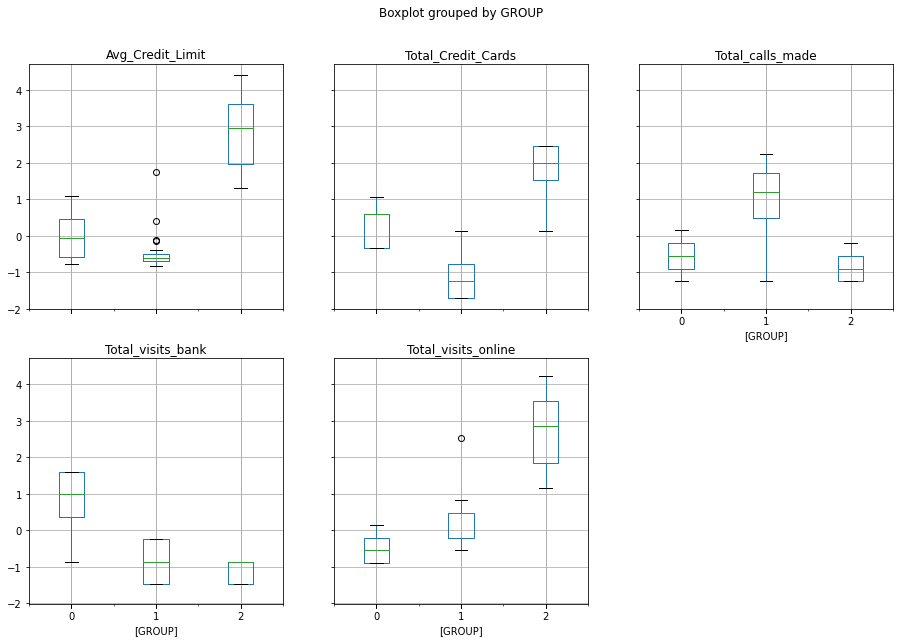

In [197]:
scaledccDf.boxplot(by='GROUP', layout = (2,3),figsize=(15,10))



In [198]:
scaledccDf.drop('GROUP',axis=1)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


# Question 4

In [199]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points


In [200]:
#closer it is to 1, the better is the clustering

Z = linkage(scaledccDf, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(scaledccDf))

c

0.9132845004056375

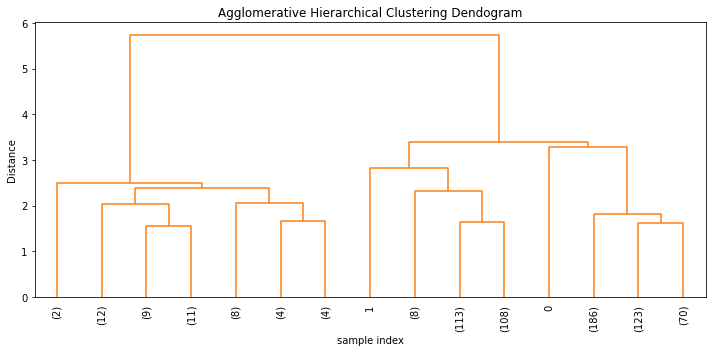

In [201]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,p=15,truncate_mode='lastp', leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()


In [202]:
Z = linkage(scaledccDf, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(scaledccDf))

c

0.8905363530822484

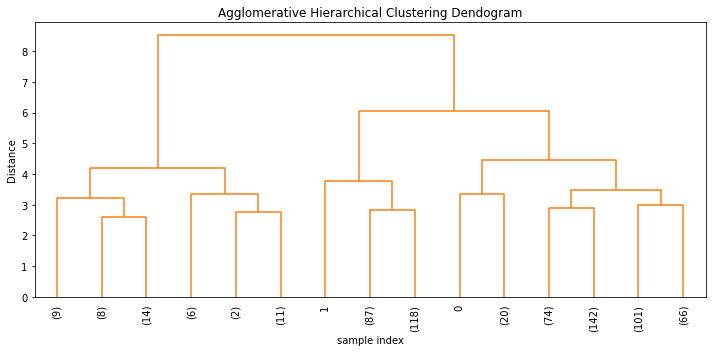

In [203]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,p=15,truncate_mode='lastp', leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [204]:
Z = linkage(scaledccDf, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(scaledccDf))

c

0.7715948322159432

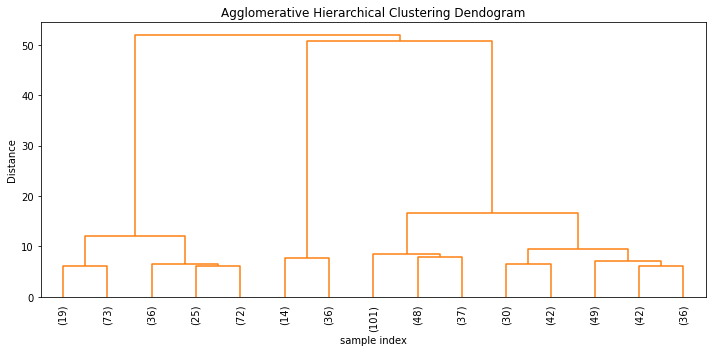

In [205]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,p=15,truncate_mode='lastp', leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

# Question 5

In [206]:
from sklearn.cluster import AgglomerativeClustering 

model=AgglomerativeClustering(n_clusters=2, affinity='euclidean',  linkage='average')
model.fit(scaledccDf)
preds=model.labels_
score2 = silhouette_score(scaledccDf, preds)
score2

0.5787549570370697

In [207]:
print('Kmeans silhouette_score=',score1, 'Hierarchical silhouette_score=',score2)

Kmeans silhouette_score= 0.5157182558881063 Hierarchical silhouette_score= 0.5787549570370697


# Question 6

Kmeans has 3 clusters and hierachial has 2 clusters . 

# QUESTION 7

How many different segments of customers are there?
Looks like there are 3 different types of customers
Customers with high, moderate , low number of credit cards and this is directly proportional to their avg credit limit

How are these segments different from each other?
As I meioned in the previous answer more the number of cards the more avg credit limit we can see in the heat map they are positively correlated

What are your recommendations to the bank on how to better market to and service these customers?

Bank can target promotions based on their number of cards and avg credit limit. 
Like providing more cost tracking and card tracking tools to the customers with higer number of cards.
Showcasing some low budget products promotions to lower credit limit holders. Encouraging to spend more and increase the credit limit to make them fall in to higher credit limit group . Advertize them with new credit card offers and deals



